# <center>BMI 598: Project</center>

# <center>Python: data preprocessing</center>

## <center>Klim Drobnykh and Jitesh Pabla</center>

In [0]:
from __future__ import print_function
from past.builtins import xrange

# folder = '/content/drive/My Drive/my_colab/BMI 598/'
folder = 'A:/BMI 598 project/'
# from google.colab import drive
# drive.mount('/content/drive')
# import os
# os.chdir(folder)
# !pwd

# For compatibility with Python 2


from math import sqrt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

# To support plots
import matplotlib.pyplot as plt


# Import other libraies
# !pip install nltk
# import nltk
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# !pip install textdistance[extras]
import textdistance
# !pip install pyspellchecker

import os
import pickle

In [0]:
import seaborn as sns

sns.set(color_codes=True)

# To display all the plots inline
%matplotlib inline

In [0]:
TYPE_DATA = 'sentences'
TYPE_TOKENIZER = 'tokenized'
TYPE_FEATURES = 'features'

In [0]:
SEED = 598

In [0]:
# params_dict = pickle.load(open("get_optimal_rf_model_params.p", "rb"))
# params_dict

Accuracy metric:

In [0]:
def accuracy(y_true, y_hat):
    return pearsonr(y_true, y_hat)[0]

To install and import packages:

In [0]:
def install_and_import(package):
    import importlib
    try:
        importlib.import_module(package)
    except ImportError:
        import subprocess
        print(subprocess.check_output(["pip", "install", package]))
    finally:
        globals()[package] = importlib.import_module(package)

To increase quality of figures:

In [0]:
plt.rcParams["figure.figsize"] = (10, 5)

To cache the values:

In [0]:
def save(data, name):
    file = folder + 'cache/' + name + '.p'
    pickle.dump(data, open(file, "wb"))
    print(file + ' saved...')
    
def load(name):
    file = folder + 'cache/' + name + '.p'
    if os.path.exists(file):
        data = pickle.load(open(file, "rb"))
        print(file + ' exists, loaded...')
        return data
    return None 

To evaluate the model:

In [0]:
from sklearn.model_selection import train_test_split

def train_data_split(X_train, y_train):
    return train_test_split(X_train['data'], y_train, test_size=0.2, random_state=SEED)

def predict_train(X_train, y_train, reg):
    if X_train['type'] != TYPE_FEATURES:
        print('Wrong usage!')
        return
    _X_train, _X_test, _y_train, _y_test = train_data_split(X_train, y_train)
    reg.fit(_X_train, _y_train)
    y_hat = reg.predict(_X_test)
    return y_hat, _y_test

def predict_test(X_train, y_train, reg, X_test):
    if X_train['type'] != TYPE_FEATURES:
        print('Wrong usage!')
        return
    if X_test['type'] != TYPE_FEATURES:
        print('Wrong usage!')
        return
    reg.fit(X_train['data'], y_train)
    return reg.predict(X_test['data'])

To plot accuracy:

In [0]:
def plot_accuracy(y, y_hat):
    print('Accuracy:', accuracy(y, y_hat))
    plt.plot(y, y_hat, 'ro')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Predicted vs Actual')
    plt.show()

To tune RF:

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

def get_optimal_rf_model(X, y):
    if X['type'] != TYPE_FEATURES:
        print('Wrong usage!')
        return
    params = {
      'learning_rate': 0.01, 
      'random_state': 598, 
      'max_features': 'sqrt'
    }
    if not os.path.exists("get_optimal_rf_model_params.p"):
        params_dict = {}
        pickle.dump(params_dict, open("get_optimal_rf_model_params.p", "wb"))
    params_dict = pickle.load(open("get_optimal_rf_model_params.p", "rb"))
    if X['name'] not in params_dict:
        model = GridSearchCV(GradientBoostingRegressor(**params),
                                cv=5,
                                n_jobs=-1,
                                iid=False,
                                param_grid={
                                    'n_estimators':[200, 300, 400, 500],
                                    'max_depth': [4, 5, 6, 7],
                                    'min_samples_split': [2, 4, 6, 8],
                                    'subsample': [0.6, 0.7, 0.8]
                                })
        model.fit(X['data'], y)
        print('Optimal parameters:', model.best_params_)
        params_dict[X['name']] = model.best_params_
        pickle.dump(params_dict, open("get_optimal_rf_model_params.p", "wb"))
        best_params = model.best_params_
    else:
        best_params = params_dict[X['name']]
    ml_alg = GradientBoostingRegressor(**params, **best_params)
    return ml_alg

def get_optimal_rf_model_train(X, y):
    if X['type'] != TYPE_FEATURES:
        print('Wrong usage!')
        return
    params = {
      'learning_rate': 0.01, 
      'random_state': 598, 
      'max_features': 'sqrt'
    }
    if not os.path.exists("get_optimal_rf_model_params.p"):
        params_dict = {}
        pickle.dump(params_dict, open("get_optimal_rf_model_params.p", "wb"))
    params_dict = pickle.load(open("get_optimal_rf_model_params.p", "rb"))
    if X['name'] + '_train' not in params_dict:
        model = GridSearchCV(GradientBoostingRegressor(**params),
                                cv=5,
                                n_jobs=-1,
                                iid=False,
                                param_grid={
                                    'n_estimators':[200, 300, 400, 500],
                                    'max_depth': [4, 5, 6, 7],
                                    'min_samples_split': [2, 4, 6, 8],
                                    'subsample': [0.6, 0.7, 0.8]
                                })
        _X_train, _X_test, _y_train, _y_test = train_data_split(X, y)
        model.fit(_X_train, _y_train)
        print('Optimal parameters:', model.best_params_)
        params_dict[X['name'] + '_train'] = model.best_params_
        pickle.dump(params_dict, open("get_optimal_rf_model_params.p", "wb"))
        best_params = model.best_params_
    else:
        best_params = params_dict[X['name'] + '_train']
    ml_alg = GradientBoostingRegressor(**params, **best_params)
    return ml_alg

## <center>1. Load the data</center>

In [0]:
def get_data_train(file):
    data = pd.read_csv(file, sep='\t', header=None, names=["Sentence #1", "Sentence #2", "Similarity"])
    X = data.values[:, :2]
    y = data['Similarity'].values
    return (X, y)

def get_data_test(file):
    X = pd.read_csv(file + '.txt', sep='\t', header=None, names=["Sentence #1", "Sentence #2"]).values
    y = pd.read_csv(file + '.gs.sim.txt', sep='\t', header=None, names=["Similarity"]).values[:, 0]
    return (X, y)

X_train, y_train = get_data_train('clinicalSTS2019.train.txt')

X_test, y_test = get_data_test('clinicalSTS2019.test')

data_train_src = pd.read_csv('clinicalSTS2019.train.txt', sep='\t', header=None, names=["Sentence #1", "Sentence #2", "Similarity"])

def create_data(data, name):
    return {'data': data, 'name': name, 'type': TYPE_DATA}

def create_tokens(data, name):
    return {'data': data, 'name': name, 'type': TYPE_TOKENIZER}

def create_features(data, name, names=[]):
    return {'data': data, 'name': name, 'type': TYPE_FEATURES, 'names': names}

def create_features_crop(features, lambda_slice):
    return {'data': lambda_slice(features['data']), 'name': features['name']+'_cropped', 'type': TYPE_FEATURES, 'names': features['names']}

def create_features_concat(features1, features2):
    return {'data': np.concatenate([features1['data'], features2['data']], axis=1), 
            'name': 'Concat(' + features1['name'] + ',' + features2['name'] + ')',
            'type': TYPE_FEATURES, 
            'names': features1['names']}

X_train = create_data(X_train, 'train_data')
X_test = create_data(X_test, 'test_data')

In [0]:
X_train

{'data': array([[' Patient arrives, via hospital wheelchair, Gait steady, History obtained from patient, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time.',
         ' Complex assessment performed, Patient arrives ambulatory, Gait steady, History obtained from, parent, Patient appears comfortable, Patient cooperative, alert, Oriented to person, place and time.'],
        ['oxycodone [ROXICODONE] 5 mg tablet 0.5-1 tablets by mouth every 4 hours as needed.',
         'pantoprazole [PROTONIX] 40 mg tablet enteric coated 1 tablet by mouth Bid before meals.'],
        ['The patient has missed 0 hours of work in the past seven days for issues not related to depression.',
         ' In the past year the patient has the following number of visits: none in the hospital  none in the er and  one as an outpatient.'],
        ...,
        ['Explained diagnosis and treatment plan; patient/child/care giver expressed understanding of the content.',
         '

In [0]:
X_test

{'data': array([['Requested to see patient for evaluation of: pressure ulcer consult.',
         'male who presents for evaluation of Med Management.'],
        ['Fosamax 70 mg tablet 1 tablet by mouth every week.',
         'Vitamin C 500 mg tablet 1 tablet by mouth two times a day.'],
        ['Please let me know if you have any additional questions.',
         'Let us know if you have any further questions.'],
        ['atenolol 50 mg tablet 1 tablet by mouth two times a day.',
         'senna/sennosides [SENOKOT] 8.6 mg tablet 1 tablet by mouth two times a day as needed.'],
        ['The patient presented to the ED today for evaluation.',
         'The patient was attentive, ready to learn and verbalized understanding of the new regimen.'],
        ['sertraline [ZOLOFT] 100 mg tablet 2 tablets by mouth one time daily.',
         'Flomax 0.4 mg capsule sustained release 24 hour 1 capsule by mouth one time daily as needed.'],
        ['ranitidine [ZANTAC] 150 mg tablet 1 tablet by mo

In [0]:
y_test

array([0.5, 1. , 5. , 1. , 0. , 1. , 1. , 0.5, 1. , 1. , 2.5, 1. , 1. ,
       0. , 4. , 3.5, 4. , 1. , 4.5, 1.5, 0.5, 0. , 1. , 0. , 1. , 0. ,
       0.5, 2. , 1.5, 0. , 0. , 5. , 1. , 0.5, 1.5, 1. , 0.5, 3. , 4. ,
       4. , 4. , 1. , 1.5, 1. , 1.5, 1. , 3.5, 1. , 1. , 1. , 1. , 1. ,
       1. , 0.5, 0. , 3. , 4. , 1. , 4. , 2.5, 1. , 0. , 0.5, 3.5, 4. ,
       4. , 1. , 1. , 1.5, 0. , 1. , 0. , 0.5, 1. , 3. , 1. , 4.5, 5. ,
       1. , 1. , 0. , 1. , 4. , 1. , 0. , 0.5, 1.5, 0. , 1. , 1. , 2. ,
       4. , 0. , 0. , 2.5, 1. , 2.5, 4. , 2. , 3. , 4. , 3. , 0.5, 2.5,
       1. , 1. , 0. , 2. , 0.5, 1. , 5. , 1. , 0. , 4. , 3.5, 0. , 1. ,
       1. , 1. , 1.5, 4. , 3. , 1.5, 0. , 1. , 0. , 1.5, 4.5, 0. , 5. ,
       4.5, 0. , 1. , 2. , 4. , 0.5, 0.5, 2.5, 0.5, 1. , 1. , 4.5, 5. ,
       0. , 4. , 0. , 1. , 2. , 1. , 0. , 1. , 0. , 0. , 4.5, 1. , 4.5,
       1. , 1.5, 0.5, 1. , 4. , 1. , 1. , 0. , 0. , 2. , 1. , 1. , 0. ,
       0. , 1. , 1. , 1. , 2. , 5. , 0. , 0. , 4.5, 5. , 4. , 1.

In [0]:
sentences = set()
others = []
for i in X_train['data']:
    if i[0] in sentences:
        others.append(i[0])
    sentences.add(i[0])
    if i[1] in sentences:
        others.append(i[1])
    sentences.add(i[1])
print(len(sentences))
#print(others)
print(len(others))

2688
620


In [0]:
sentences_pair = set()
others = []
for i in X_train['data']:
    pair = (i[0], i[1])
    pair2 = (i[1], i[0])
    if pair in sentences_pair:
        others.append(pair)
    sentences_pair.add(pair)
    if pair2 in sentences_pair:
        others.append(pair2)
    sentences_pair.add(pair2)

print(len(sentences_pair))
print(others)
print(len(others))

3286
[('Thank you for choosing the Name, M.D.. care team for your health care needs!', 'Thank you for choosing the Name, M.D.. care team for your health care needs!'), ('Thank you for choosing the Name, M.D.. care team for your health care needs!', 'Thank you for choosing the Name, M.D.. care team for your health care needs!'), ('Thank you for choosing the Name, M.D.. care team for your health care needs!', 'Thank you for choosing the Name, M.D.. care team for your health care needs!'), ('Thank you for choosing the Name, M.D.. care team for your health care needs!', 'Thank you for choosing the Name, M.D.. care team for your health care needs!'), ('Thank you for choosing the Name, M.D.. care team for your health care needs!', 'Thank you for choosing the Name, M.D.. care team for your health care needs!'), ('Thank you for choosing the Name, M.D.. care team for your health care needs!', 'Thank you for choosing the Name, M.D.. care team for your health care needs!'), ('Thank you for choosi

In [0]:
y_train

array([3.  , 1.  , 0.  , ..., 4.25, 0.  , 3.  ])

[]

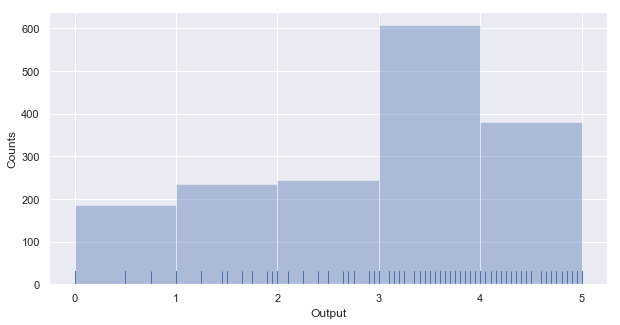

In [0]:
ax = sns.distplot(y_train, bins=5, kde=False, rug=True)
ax.set_ylabel('Counts')
ax.set_xlabel('Output')
plt.plot()

In [0]:
np.bincount(y_train.astype(np.int64))

array([185, 236, 245, 607, 336,  45], dtype=int64)

## <center>2. Simple regressors</center>

### <center>2.1. Levenshtein distance regressor</center>

In [0]:
def levenshtein_metric(seq1, seq2):
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in xrange(size_x):
        matrix [x, 0] = x
    for y in xrange(size_y):
        matrix [0, y] = y

    for x in xrange(1, size_x):
        for y in xrange(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    # print (matrix)
    return (matrix[size_x - 1, size_y - 1])

In [0]:
class LevinshteinExtractor:
    def __init__(self):
        self.__name = 'LevinshteinE'
  
    def process_sent(self, sent1, sent2, print_sent=False):
        res = textdistance.levenshtein(sent1, sent2)
        return res

    def process(self, data):
        if data['type'] != TYPE_DATA:
            print('Wrong usage!')
            return
        predicted = load(self.__name + '(' + data['name'] + ')')
        if predicted is None:
            predicted = np.zeros((len(data['data']), 1))
            for i, sample in enumerate(data['data']):
                predicted[i] = textdistance.levenshtein(sample[0], sample[1])
            save(predicted, self.__name + '(' + data['name'] + ')')
        return create_features(predicted, self.__name + '(' + data['name'] + ')')

In [0]:
levinshtein = LevinshteinExtractor()

In [0]:
levenshtein_train = levinshtein.process(X_train)
levenshtein_test = levinshtein.process(X_test)
print(levenshtein_train['data'].shape)

A:/BMI 598 project/cache/LevinshteinE(train_data).p exists, loaded...
A:/BMI 598 project/cache/LevinshteinE(test_data).p exists, loaded...
(1654, 1)


Accuracy: 0.10472203714176248


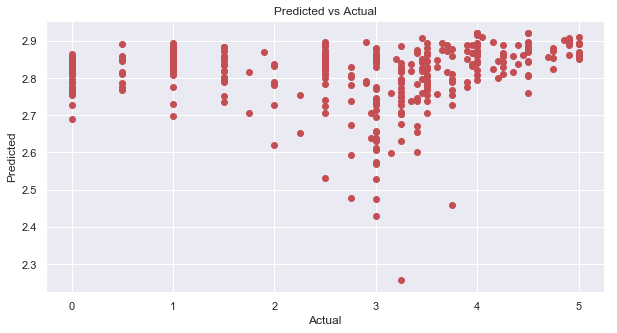

In [0]:
y_train_hat, _y_train = predict_train(levenshtein_train, y_train, LinearRegression())
plot_accuracy(_y_train, y_train_hat)

Accuracy: 0.0295537806365749


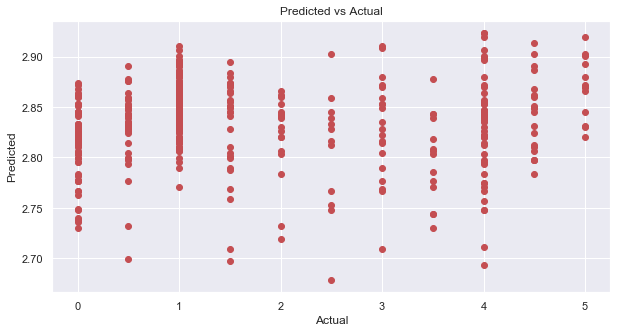

In [0]:
y_test_hat = predict_test(levenshtein_train, y_train, LinearRegression(), levenshtein_test)
plot_accuracy(y_test, y_test_hat)

## <center>3. Preprocessing</center>

In [0]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
stop_words1 = set(stopwords.words('english'))
stop_words2 = ENGLISH_STOP_WORDS
print(stop_words1)
print(stop_words2)

{'up', 'on', 'been', 'how', 'haven', 's', "shouldn't", 'who', 'such', 'when', 'd', 'his', "hadn't", 'are', 'didn', "that'll", 'out', 'just', 'whom', 'more', 'hasn', 'hers', 'am', 'and', 'against', 'ourselves', 'all', 'again', 'be', 'will', 'mustn', 'above', 'don', 'into', 'after', 'this', 'do', 'until', 'has', 'in', 'wouldn', 'down', 'an', "don't", 'then', 'off', 'ma', 'if', 'mightn', 'isn', 'at', "mustn't", 'was', "you'll", 'own', "you'd", 'those', 'your', 'only', 'himself', 'any', 'that', 'needn', "it's", 've', 'why', 'we', 'or', "haven't", 'ours', 'yours', "you're", 'myself', 'did', 'o', 'themselves', 'have', 'm', 'for', "isn't", 'shouldn', 'should', 'by', 'while', 'so', 'y', 'because', 'can', 'theirs', "won't", 'further', 'here', 'most', 'to', 'these', 'my', 'but', 'yourself', 'they', 'other', 'same', 'ain', 'each', 'itself', 'were', 'you', 'under', 'had', 'them', 'yourselves', 'its', 'aren', 'hadn', 'doing', "she's", "shan't", 'of', 'me', 'nor', 'over', 'with', 'which', 're', "doe

In [0]:
# !pip install inflect
import inflect
inflect_engine = inflect.engine()

In [0]:
# !pip install stanfordnlp
import stanfordnlp

In [0]:
import re
import string
import nltk

stop_words = stop_words1

class PreprocessorLemmatizerNLTK:
    def __init__(self):
        # install_and_import('stanfordnlp')
        stanfordnlp.download('en', resource_dir=folder+'en', force=True)
        self.nlp = stanfordnlp.Pipeline(processors='tokenize,mwt,pos,lemma', models_dir=folder+'en')
        self.name = 'LemmaNLTK'
  
    def preprocess_sent(self, sent, print_sent=False):
        sent = sent.lower()
        doc = self.nlp(sent)
        tokens = sum([[w.text for w in s.tokens] for s in doc.sentences], [])
        tokens = [i for i in tokens if (not i in stop_words) and (not i in string.punctuation)]
        return tokens

    def preprocess(self, X):
        if X['type'] != TYPE_DATA:
            print('Wrong usage!')
            return
        res = load(self.name + '(' + X['name'] + ')')
        if res is None:
            res = [[]]*len(X['data'])
            for i in range(len(X['data'])):
                if i % 100 == 0:
                    print(i)
                res[i] = [self.preprocess_sent(el) for el in X['data'][i]]
            save(res, self.name + '(' + X['name'] + ')')
        return create_tokens(res, self.name + '(' + X['name'] + ')')

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
from nltk.corpus import wordnet
tag_dict = {"J": wordnet.ADJ,
            "N": wordnet.NOUN,
            "V": wordnet.VERB,
            "R": wordnet.ADV}

class PreprocessorTokenizer:
    def __init__(self):
        self.name = 'Token'
  
    # https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908
    def preprocess_sent(self, sent):
        sent = sent.lower()
        sent = re.sub(r'\d+', '', sent)
        sent = sent.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
        tokens = nltk.word_tokenize(sent)
        tokens = [i for i in tokens if not i in stop_words]
        # poses = [p[1][0].upper() for p in nltk.pos_tag(tokens)]
        # tokens = [lemmatizer.lemmatize(token, tag_dict.get(pos, wordnet.NOUN)) for token, pos in zip(tokens, poses)]
        return tokens

    def preprocess(self, X):
        if X['type'] != TYPE_DATA:
            print('Wrong usage!')
            return
        res = load(self.name + '(' + X['name'] + ')')
        if res is None:
            res = [[]]*len(X['data'])
            for i in range(len(X['data'])):
                if i % 100 == 0:
                    print(i)
                res[i] = [self.preprocess_sent(el) for el in X['data'][i]]
            save(res, self.name + '(' + X['name'] + ')')
        return create_tokens(res, self.name + '(' + X['name'] + ')')


class PreprocessorTokenizerDigits:
    def __init__(self):
        self.name = 'TokenDigits'
  
    # https://stackoverflow.com/questions/4289331/how-to-extract-numbers-from-a-string-in-python
    def preprocess_sent(self, sent, print_sent=False):
        if print_sent:
            print(sent)
        sent = sent.lower()
        if print_sent:
            print(sent)
        digits = [(m.start(0), m.end(0)) for m in re.finditer("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", sent)]
        if len(digits):
            for x in digits[::-1]:
                digit = sent[x[0]:x[1]]
                digit = float(digit.replace(',', ''))
                if digit.is_integer():
                      digit = int(digit) 
                sent = sent[:x[0]] + ' ' + ' '.join(inflect_engine.number_to_words(digit, wantlist=True)) + ' ' + sent[x[1]:]
        if print_sent:
              print(sent)
        sent = sent.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
        if print_sent:
              print(sent)
        tokens = nltk.word_tokenize(sent)
        if print_sent:
              print(tokens)
        tokens = [i for i in tokens if not i in stop_words]
        if print_sent:
              print(tokens)
        return tokens

    def preprocess(self, X):
        if X['type'] != TYPE_DATA:
            print('Wrong usage!')
            return
        res = load(self.name + '(' + X['name'] + ')')
        if res is None:
            res = [[]]*len(X['data'])
            for i in range(len(X['data'])):
                if i % 100 == 0:
                      print(i)
                res[i] = [self.preprocess_sent(el) for el in X['data'][i]]
            save(res, self.name + '(' + X['name'] + ')')
        return create_tokens(res, self.name + '(' + X['name'] + ')')
    
class PreprocessorTokenizerDigitsDifferent:
    def __init__(self):
        self.name = 'TokenDigitsDifferent'
  
    # https://stackoverflow.com/questions/4289331/how-to-extract-numbers-from-a-string-in-python
    def preprocess_sent(self, sent, print_sent=False):
        if print_sent:
            print(sent)
        sent = sent.lower()
        if print_sent:
            print(sent)
        sent = re.sub(r'\d+', '', sent)
        if print_sent:
              print(sent)
        sent = sent.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
        if print_sent:
              print(sent)
        tokens = nltk.word_tokenize(sent)
        if print_sent:
              print(tokens)
        tokens = [i for i in tokens if not i in stop_words]
        if print_sent:
              print(tokens)
        return tokens
    
    def preprocess_sents(self, sent1, sent2, print_sent=False):
        import copy
        tokens1 = self.preprocess_sent(sent1, print_sent)
        tokens2 = self.preprocess_sent(sent2, print_sent)
        stems1 = [stemmer.stem(x) for x in tokens1]
        stems2 = [stemmer.stem(x) for x in tokens2]
        stems_common = set(stems1).intersection(set(stems2))
        tokens1 = [x for x in tokens1 if stemmer.stem(x) not in stems_common]
        tokens2 = [x for x in tokens2 if stemmer.stem(x) not in stems_common]
        return [tokens1, tokens2]

    def preprocess(self, X):
        if X['type'] != TYPE_DATA:
            print('Wrong usage!')
            return
        res = load(self.name + '(' + X['name'] + ')')
        if res is None:
            res = [[]]*len(X['data'])
            for i in range(len(X['data'])):
                if i % 100 == 0:
                      print(i)
                res[i] = self.preprocess_sents(X['data'][i][0], X['data'][i][1])
            save(res, self.name + '(' + X['name'] + ')')
        return create_tokens(res, self.name + '(' + X['name'] + ')')

## <center>4. Feature extraction</center>

### <center>4.1. Token-based measures</center>

In [0]:
class TokenBasedFeatureExtractor:
    def __init__(self):
        self.jaccard = textdistance.Jaccard(as_set=True)
        self.overlap = textdistance.Overlap(as_set=True)
        self.cosine = textdistance.Cosine(as_set=True)
        self.mongeelkan = textdistance.MongeElkan()
        self.dice = textdistance.Sorensen(as_set=True)
        self.tversky = textdistance.Tversky(as_set=True)
        self.cosine = textdistance.Cosine(as_set=True)
        self.qgram2 = textdistance.Jaccard(as_set=True, qval=2)
        self.qgram3 = textdistance.Jaccard(as_set=True, qval=3)
        self.qgram4 = textdistance.Jaccard(as_set=True, qval=4)
        self.bag = textdistance.Bag()
        self.names = ['token_jaccard', 'token_overlap', 'token_cosine', 
                      'token_dice', 'token_tversky', 'token_2-qgram', 
                      'token_3-qgram', 'token_4-qgram', 'token_monge-elkan', 'token_bag']
        self.__name = 'TokenFE'


    # Also note how q-gram-, Jaccard- and cosine-distance lead to virtually 
    # the same order for q in {2,3} just differing on the scaled distance value. 
    # Those algorithms for q=1 are obviously indifferent to permuations. 
    # Jaro-Winkler again seems to care little about characters interspersed, 
    # placed randomly or missing as long as the target word’s characters are present in correct order.
    def extract(self, data_tok):
        if data_tok['type'] != TYPE_TOKENIZER:
            print('Wrong usage!')
            return
        features = load(self.__name + '(' + data_tok['name'] + ')')
        if features is None:
            features = np.zeros((len(data_tok['data']), 10))
            for i in range(len(data_tok['data'])):
                data_tok_data = data_tok['data']
                if i % 100 == 0:
                    print(i)
                features[i, 0] = self.jaccard(data_tok_data[i][0], data_tok_data[i][1])
                features[i, 1] = self.overlap(data_tok_data[i][0], data_tok_data[i][1])
                features[i, 2] = self.cosine(data_tok_data[i][0], data_tok_data[i][1])
                features[i, 3] = self.dice(data_tok_data[i][0], data_tok_data[i][1])
                features[i, 4] = self.tversky(data_tok_data[i][0], data_tok_data[i][1])
                try:
                    f = self.qgram2(data_tok_data[i][0], data_tok_data[i][1])
                except Exception as e:
                    f = 0.0
                features[i, 5] = f
                try:
                    f = self.qgram3(data_tok_data[i][0], data_tok_data[i][1])
                except Exception as e:
                    f = 0.0
                features[i, 6] = f
                try:
                    f = self.qgram4(data_tok_data[i][0], data_tok_data[i][1])
                except Exception as e:
                    f = 0.0
                features[i, 7] = f
                features[i, 8] = self.mongeelkan(data_tok_data[i][0], data_tok_data[i][1])
                features[i, 9] = self.bag(data_tok_data[i][0], data_tok_data[i][1])
            save(features, self.__name + '(' + data_tok['name'] + ')')
        return create_features(features, self.__name + '(' + data_tok['name'] + ')', self.names)

### <center>4.2. Embedding-based features</center>

In [0]:
# !pip install wget
# !pip install gdown

In [0]:
import gensim

class W2VModelWget:
  
    def __init__(self, url, name, nfeatures, limit=None):
        self.url = url
        self.file = url[url.rfind("/") + 1:]
        self.nfeatures = nfeatures
        self.model = None
        self.limit = limit
        self.name = name

    def get_model(self):
        if self.model is None:
            if not os.path.exists(self.file):
                print('Downloading the model...')
                import wget
                wget.download(url, out = folder + self.file)
            self.model = gensim.models.KeyedVectors.load_word2vec_format(folder + self.file, 
                                                                   binary = True,
                                                                   limit=self.limit)
        return self.model

    def get_nfeatures(self):
        return self.nfeatures

    def get_name(self):
        return self.name

    def get_vocab(self):
        vocab = load('word2vec_vocab(' + self.name + ')')
        if vocab is None:
            model = self.get_model()
            vocab = tuple(model.wv.vocab)
            save(vocab, 'word2vec_vocab(' + self.name + ')')
        return vocab
    

class W2VModelGdown:
  
    def __init__(self, url, name, file, nfeatures, limit=None):
        self.url = url
        self.file = file
        self.nfeatures = nfeatures
        self.model = None
        self.limit = limit
        self.name = name

    def get_model(self, limit=None):
        if self.model is None:
            if not os.path.exists(self.file):
                print('Downloading the model...')
                import gdown
                gdown.download(url, out = folder + self.file)
            self.model = gensim.models.KeyedVectors.load_word2vec_format(folder + self.file, 
                                                                         binary = True,
                                                                         limit = self.limit)
        return self.model 

    def get_nfeatures(self):
        return self.nfeatures

    def get_name(self):
        return self.name

    def get_vocab(self):
        vocab = load('word2vec_vocab(' + self.name + ')')
        if vocab is None:
            model = self.get_model()
            vocab = tuple(model.wv.vocab)
            save(vocab, 'word2vec_vocab(' + self.name + ')')
        return vocab


In [0]:
google_news = W2VModelGdown('https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM', 'GoogleNews', 'GoogleNews-vectors-negative300.bin', 300)
bio_word_vec = W2VModelWget('https://ftp.ncbi.nlm.nih.gov/pub/lu/Suppl/BioSentVec/BioWordVec_PubMed_MIMICIII_d200.vec.bin', 'biowordvec', 200)# , limit=12000000)
pmres_1 = W2VModelWget('http://evexdb.org/pmresources/vec-space-models/PMC-w2v.bin', 'pmres1', 200)
pmres_2 = W2VModelWget('http://evexdb.org/pmresources/vec-space-models/PubMed-and-PMC-w2v.bin', 'pmres2', 200)
pmres_3 = W2VModelWget('http://evexdb.org/pmresources/vec-space-models/PubMed-w2v.bin', 'pmres3', 200)
pmres_4 = W2VModelWget('http://evexdb.org/pmresources/vec-space-models/wikipedia-pubmed-and-PMC-w2v.bin', 'pmres4', 200)

In [0]:
class EmbeddingBasedFeatureAggregatorMin:
    def __init__(self):
        pass

    def name(self):
        return 'max'

    def aggregate(self, sent, w2v_model):
        feature_vec = np.zeros((w2v_model.get_nfeatures(),), dtype="float32") + np.finfo("float32").max
        model = w2v_model.get_model()
        n = 0
        for word in sent:
            if word in model.wv.vocab:
                n += 1
                feature_vec = np.minimum(feature_vec, model[word])
        return feature_vec if n >= 1 else model['the']

In [0]:
class EmbeddingBasedFeatureAggregatorMax:
    def __init__(self):
        pass

    def name(self):
        return 'max'

    def aggregate(self, sent, w2v_model):
        feature_vec = np.zeros((w2v_model.get_nfeatures(),), dtype="float32") + np.finfo("float32").min
        model = w2v_model.get_model()
        n = 0
        for word in sent:
            if word in model.wv.vocab:
                n += 1
                feature_vec = np.maximum(feature_vec, model[word])
        return feature_vec if n >= 1 else model['the']

In [0]:
class EmbeddingBasedFeatureAggregatorAvg:
    def __init__(self):
        pass

    def name(self):
        return 'avg'

    def aggregate(self, sent, w2v_model):
        feature_vec = np.zeros((w2v_model.get_nfeatures(),), dtype="float32")
        nwords = 0
        model = w2v_model.get_model()
        for word in sent:
            if word in model.wv.vocab:
                feature_vec = np.add(feature_vec, model[word])
                nwords += 1
        return feature_vec / nwords if nwords >= 1 else model['the']

In [0]:
from scipy.stats import pearsonr

#function to return different features like cosine similarity etc. 
''' Cosine similarity [18], the
Euclidean similarity [35] and its variation Squared Euclidean
similarity, the Block similarity [16], the Correlation similarity
[36] for a pair of average or max embeddings. We also used the
Word Mover’s Distance (WMD) to measure the similarity
between entire sentences [37]. '''
class EmbeddingBasedFeatureExtractor:
    def __init__(self):
        self.aggregators = [EmbeddingBasedFeatureAggregatorMin(), EmbeddingBasedFeatureAggregatorMax(), EmbeddingBasedFeatureAggregatorAvg()]
        self.names = [m+a.name() for m in ['emb_cosine', 'emb_euclidean', 'emb_sq_euclidean', 'emb_manhattan', 'emb_pearson'] for a in self.aggregators] + ['emb_wmdist_similarity']
        self.__name = 'EmbeddingFE'

    def extract(self, data_tok, model):
        if data_tok['type'] != TYPE_TOKENIZER:
            print('Wrong usage!')
            return
        features = load(self.__name + '(' + model.get_name() + ',' + data_tok['name'] + ')')
        vocab = model.get_vocab()
        if features is None:
            features = np.zeros((len(data_tok['data']), 5*len(self.aggregators) + 1))
            for i in range(len(data_tok['data'])):
                if i % 100 == 0:
                    print(i)
                for agg_i, agg in enumerate(self.aggregators):
                    agg_feat_1 = agg.aggregate(data_tok['data'][i][0], model)
                    agg_feat_2 = agg.aggregate(data_tok['data'][i][1], model)
                    if not np.isfinite(agg_feat_1).all():
                        print(i)
                        print(agg_feat_1)
                        print(data_tok['data'][i][0])
                    if not np.isfinite(agg_feat_2).all():
                        print(i)
                        print(agg_feat_2)
                        print(data_tok['data'][i][1])
                    features[i, agg_i*5 + 0] = np.dot(agg_feat_1, agg_feat_2) / (np.linalg.norm(agg_feat_1) * np.linalg.norm(agg_feat_2))
                    euclidean_dist = np.linalg.norm(agg_feat_1 - agg_feat_2)
                    features[i, agg_i*5 + 1] = euclidean_dist
                    features[i, agg_i*5 + 2] = euclidean_dist ** 2
                    features[i, agg_i*5 + 3] = np.linalg.norm(agg_feat_1 - agg_feat_2, ord=1)
                    features[i, agg_i*5 + 4], _ = pearsonr(agg_feat_1, agg_feat_2)
                _sent1 = data_tok['data'][i][0]
                if len([w for w in _sent1 if w in vocab]) == 0:
                    _sent1 = ['the']
                _sent2 = data_tok['data'][i][1]
                if len([w for w in _sent2 if w in vocab]) == 0:
                    _sent2 = ['the']
                features[i, 5*len(self.aggregators)] = model.get_model().wmdistance(_sent1, _sent2)
            save(features, self.__name + '(' + model.get_name() + ',' + data_tok['name'] + ')')
        return create_features(features, self.__name + '(' + model.get_name() + ',' + data_tok['name'] + ')', self.names)

In [0]:
def check_words(data, model):
    # TODO: check for tokens
    data = data['data']
    vocab = model.get_vocab()
    words_not_in_w2v = []
    for sentence_pair in data:
        for word in sentence_pair[0]:
            if (word not in vocab) and (word not in words_not_in_w2v):
                words_not_in_w2v.append(word)
        for word in sentence_pair[1]:
            if (word not in vocab) and (word not in words_not_in_w2v):
                words_not_in_w2v.append(word)
    return words_not_in_w2v

Experiments (new idea, train only)

Using biowordvec model...
Using TokenDigitsDifferent preprocessor...
A:/BMI 598 project/cache/TokenDigitsDifferent(train_data).p exists, loaded...
A:/BMI 598 project/cache/TokenFE(TokenDigitsDifferent(train_data)).p exists, loaded...
Token-based features:
Accuracy: 0.622117835764486


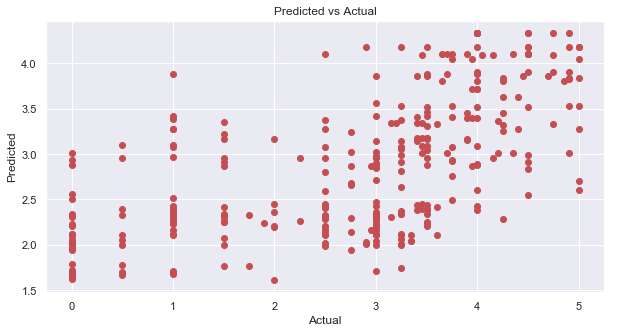

A:/BMI 598 project/cache/EmbeddingFE(biowordvec,TokenDigitsDifferent(train_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(biowordvec).p exists, loaded...
Embedding-based features:
Accuracy: 0.673163917868334


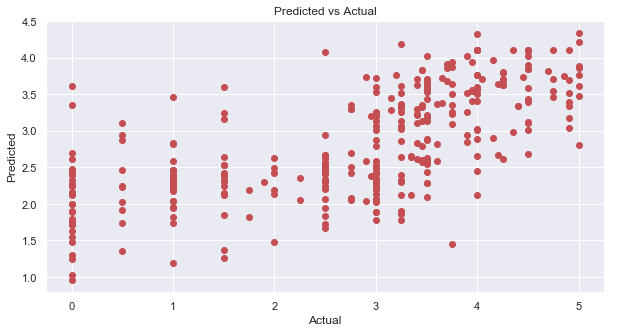

Combined features:
Accuracy: 0.6784107873117724


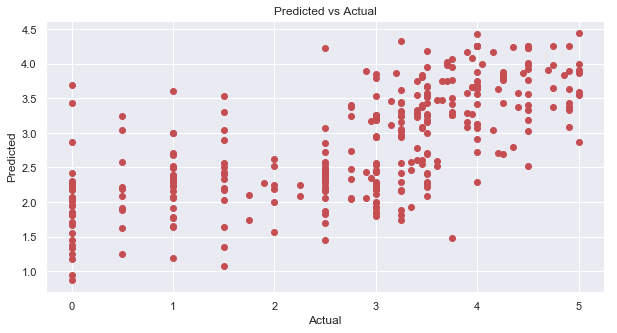

In [0]:
preprocessors = [PreprocessorTokenizerDigitsDifferent]
preprocessors = [preprocessorClass() for preprocessorClass in preprocessors]
w2v_models = [bio_word_vec]
token_based_features_extractor = TokenBasedFeatureExtractor()
embedding_based_extractor = EmbeddingBasedFeatureExtractor()
for w2v_model in w2v_models:
    for preprocessor in preprocessors:
        print('Using', w2v_model.name, 'model...')
        print('Using', preprocessor.name, 'preprocessor...')
        X_train_tok = preprocessor.preprocess(X_train)
        features_train_token = token_based_features_extractor.extract(X_train_tok)
        features_train_token_cropped = create_features_crop(features_train_token, lambda x: x[:500])
        print('Token-based features:')
        y_train_test_hat, y_train_test = predict_train(features_train_token, y_train, get_optimal_rf_model_train(features_train_token_cropped, y_train[:500]))
        plot_accuracy(y_train_test, y_train_test_hat)
        features_train_emb = embedding_based_extractor.extract(X_train_tok, w2v_model)
        features_train_emb_cropped =  create_features_crop(features_train_emb, lambda x: x[:500])
        print('Embedding-based features:')
        y_train_test_hat, y_train_test = predict_train(features_train_emb, y_train, get_optimal_rf_model_train(features_train_emb_cropped, y_train[:500]))
        plot_accuracy(y_train_test, y_train_test_hat)
        features_train_all = create_features_concat(features_train_token, features_train_emb)
        features_train_all_cropped = create_features_crop(features_train_all, lambda x: x[:500])
        print('Combined features:')
        y_train_test_hat, y_train_test = predict_train(features_train_all, y_train, get_optimal_rf_model_train(features_train_all_cropped, y_train[:500]))
        plot_accuracy(y_train_test, y_train_test_hat)
        
dissimilar_features_token = features_train_token
dissimilar_features_emb = features_train_emb
dissimilar_features_all = features_train_all

Using biowordvec model...
Using TokenDigits preprocessor...
A:/BMI 598 project/cache/TokenDigits(train_data).p exists, loaded...
A:/BMI 598 project/cache/TokenFE(TokenDigits(train_data)).p exists, loaded...
Token-based features:
Accuracy: 0.7969095009436702


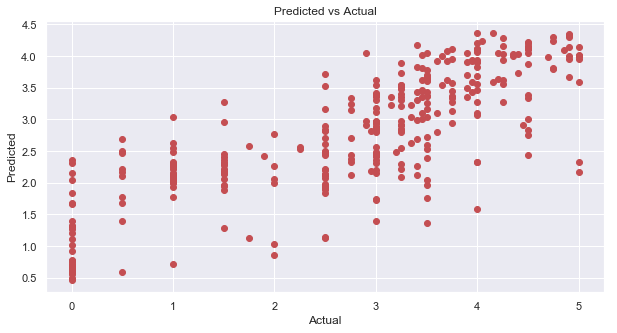

A:/BMI 598 project/cache/EmbeddingFE(biowordvec,TokenDigits(train_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(biowordvec).p exists, loaded...
Embedding-based features:
Accuracy: 0.8239687277069583


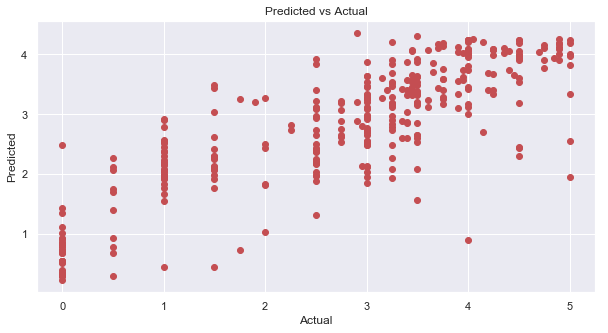

Combined features:
Accuracy: 0.84330456414485


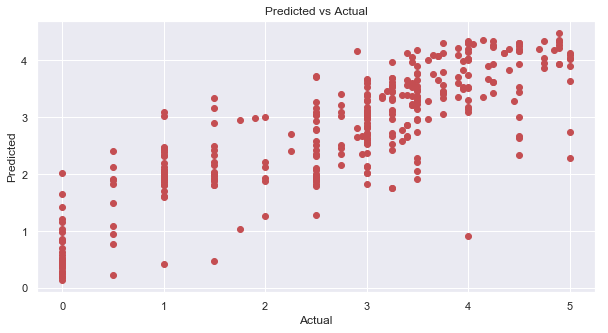

In [0]:
preprocessors = [PreprocessorTokenizerDigits]
preprocessors = [preprocessorClass() for preprocessorClass in preprocessors]
w2v_models = [bio_word_vec]
token_based_features_extractor = TokenBasedFeatureExtractor()
embedding_based_extractor = EmbeddingBasedFeatureExtractor()
for w2v_model in w2v_models:
    for preprocessor in preprocessors:
        print('Using', w2v_model.name, 'model...')
        print('Using', preprocessor.name, 'preprocessor...')
        X_train_tok = preprocessor.preprocess(X_train)
        features_train_token = token_based_features_extractor.extract(X_train_tok)
        features_train_token_cropped = create_features_crop(features_train_token, lambda x: x[:500])
        print('Token-based features:')
        y_train_test_hat, y_train_test = predict_train(features_train_token, y_train, get_optimal_rf_model_train(features_train_token_cropped, y_train[:500]))
        plot_accuracy(y_train_test, y_train_test_hat)
        features_train_emb = embedding_based_extractor.extract(X_train_tok, w2v_model)
        features_train_emb_cropped =  create_features_crop(features_train_emb, lambda x: x[:500])
        print('Embedding-based features:')
        y_train_test_hat, y_train_test = predict_train(features_train_emb, y_train, get_optimal_rf_model_train(features_train_emb_cropped, y_train[:500]))
        plot_accuracy(y_train_test, y_train_test_hat)
        features_train_all = create_features_concat(features_train_token, features_train_emb)
        features_train_all_cropped = create_features_crop(features_train_all, lambda x: x[:500])
        print('Combined features:')
        y_train_test_hat, y_train_test = predict_train(features_train_all, y_train, get_optimal_rf_model_train(features_train_all_cropped, y_train[:500]))
        plot_accuracy(y_train_test, y_train_test_hat)

Using biowordvec model...
Using TokenDigits preprocessor...
A:/BMI 598 project/cache/TokenDigits(train_data).p exists, loaded...
A:/BMI 598 project/cache/TokenFE(TokenDigits(train_data)).p exists, loaded...
Token-based features:
Accuracy: 0.8074740393908952


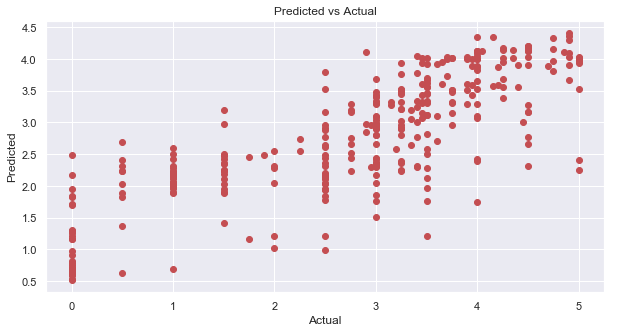

A:/BMI 598 project/cache/EmbeddingFE(biowordvec,TokenDigits(train_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(biowordvec).p exists, loaded...
Embedding-based features:
Accuracy: 0.8331076782014047


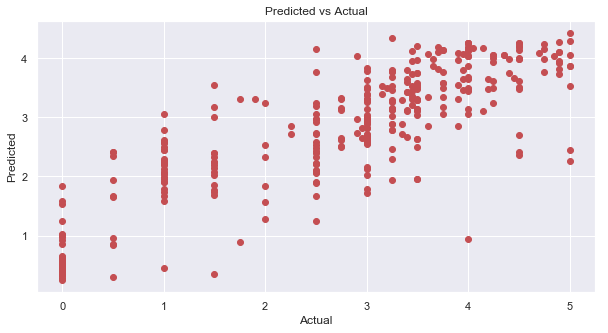

Combined features:
Accuracy: 0.8423089985272565


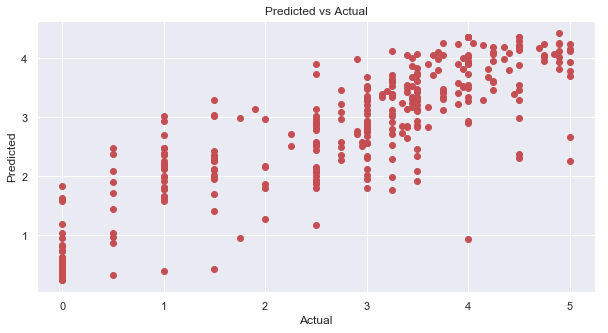

In [0]:
preprocessors = [PreprocessorTokenizerDigits]
preprocessors = [preprocessorClass() for preprocessorClass in preprocessors]
w2v_models = [bio_word_vec]
token_based_features_extractor = TokenBasedFeatureExtractor()
embedding_based_extractor = EmbeddingBasedFeatureExtractor()
for w2v_model in w2v_models:
    for preprocessor in preprocessors:
        print('Using', w2v_model.name, 'model...')
        print('Using', preprocessor.name, 'preprocessor...')
        X_train_tok = preprocessor.preprocess(X_train)
        features_train_token = token_based_features_extractor.extract(X_train_tok)
        features_train_token_combined = create_features_concat(features_train_token, dissimilar_features_token)
        features_train_token_combined_cropped = create_features_crop(features_train_token_combined, lambda x: x[:500])
        print('Token-based features:')
        y_train_test_hat, y_train_test = predict_train(features_train_token_combined, y_train, get_optimal_rf_model_train(features_train_token_combined_cropped, y_train[:500]))
        plot_accuracy(y_train_test, y_train_test_hat)
        features_train_emb = embedding_based_extractor.extract(X_train_tok, w2v_model)
        features_train_emb_combined = create_features_concat(features_train_emb, dissimilar_features_emb)
        features_train_emb_combined_cropped = create_features_crop(features_train_emb_combined, lambda x: x[:500])
        print('Embedding-based features:')
        y_train_test_hat, y_train_test = predict_train(features_train_emb_combined, y_train, get_optimal_rf_model_train(features_train_emb_combined_cropped, y_train[:500]))
        plot_accuracy(y_train_test, y_train_test_hat)
        features_train_all = create_features_concat(features_train_token, features_train_emb)
        features_train_all_combined = create_features_concat(features_train_all, dissimilar_features_all)
        features_train_all_combined_cropped = create_features_crop(features_train_all_combined, lambda x: x[:500])
        print('Combined features:')
        y_train_test_hat, y_train_test = predict_train(features_train_all_combined, y_train, get_optimal_rf_model_train(features_train_all_combined_cropped, y_train[:500]))
        plot_accuracy(y_train_test, y_train_test_hat)

To see the examples of how just the dissimilar words can affect similarity:

In [0]:
# pos = np.argsort(np.abs(y_train - y_train_hat))
# poss = [1284, 670, 1358, 442, 791, 496]
# for p in poss:
#     print('Pos: "' + str(p) + '"')
#     print('Sent1: "' + X_train['data'][p][0] + '"')
#     print('Sent2: "' + X_train['data'][p][1] + '"')
#     print('Similarity = ' + str(y_train[p]))
#     print('Predicted = ' + str(y_train_hat[p]))
# print(X_train[pos[:100]])

Let's examine BioWordVec:

In [0]:
def cosine(a, b):
    dot = np.dot(a, b)
    norma = np.linalg.norm(a)
    normb = np.linalg.norm(b)
    return dot / (norma * normb)
# print(cosine(bio_word_vec.get_model()['loratadine'], bio_word_vec.get_model()['claritin']))
# 0.6748791
# print(cosine(bio_word_vec.get_model()['loratadine'], bio_word_vec.get_model()['tramadol']))
# 0.72839266
# print(cosine(bio_word_vec.get_model()['claritin'], bio_word_vec.get_model()['tramadol']))
# 0.5766273
# print(cosine(bio_word_vec.get_model()['apple'], bio_word_vec.get_model()['tramadol']))
# 0.28168416

Experiments (train+test)

Preprocessing only

Using the default treebank "en_ewt" for language "en".
Use device: gpu
---
Loading: tokenize
With settings: 
{'model_path': 'A:/BMI 598 project/en\\en_ewt_models\\en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': 'A:/BMI 598 project/en\\en_ewt_models\\en_ewt_tagger.pt', 'pretrain_path': 'A:/BMI 598 project/en\\en_ewt_models\\en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': 'A:/BMI 598 project/en\\en_ewt_models\\en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
Done loading processors!
---
Using LemmaNLTK preprocessor...
A:/BMI 598 project/cache/LemmaNLTK(train_data).p exists, loaded...
A:/BMI 598 project/cache/LemmaNLTK(test_data).p exist

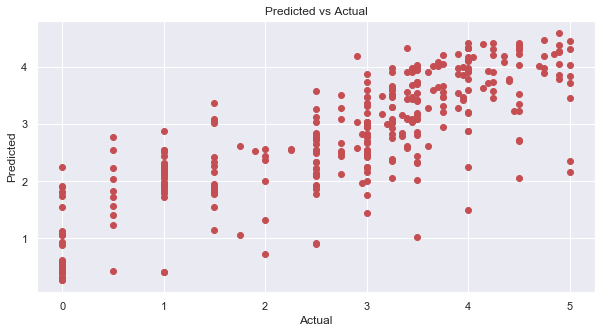

TEST:
Accuracy: 0.6182022798127165


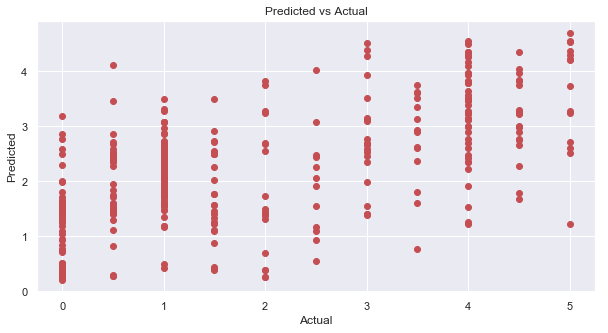

Using Token preprocessor...
A:/BMI 598 project/cache/Token(train_data).p exists, loaded...
A:/BMI 598 project/cache/Token(test_data).p exists, loaded...
A:/BMI 598 project/cache/TokenFE(Token(train_data)).p exists, loaded...
A:/BMI 598 project/cache/TokenFE(Token(test_data)).p exists, loaded...
TRAIN:
Accuracy: 0.796714555620456


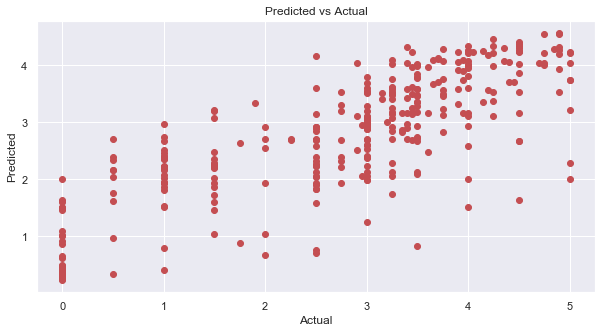

TEST:
Accuracy: 0.5776921608202626


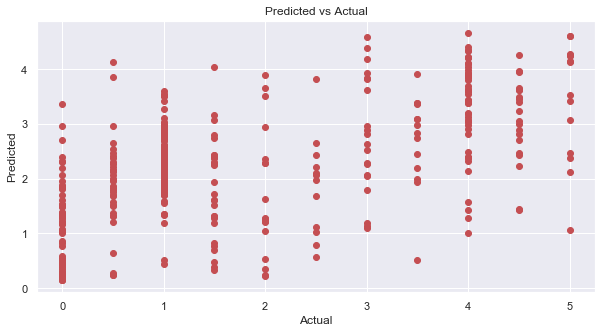

Using TokenDigits preprocessor...
A:/BMI 598 project/cache/TokenDigits(train_data).p exists, loaded...
A:/BMI 598 project/cache/TokenDigits(test_data).p exists, loaded...
A:/BMI 598 project/cache/TokenFE(TokenDigits(train_data)).p exists, loaded...
A:/BMI 598 project/cache/TokenFE(TokenDigits(test_data)).p exists, loaded...
TRAIN:
Accuracy: 0.8097351592570329


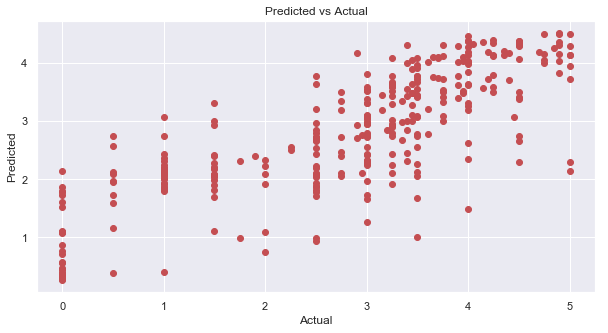

TEST:
Accuracy: 0.6199939686902824


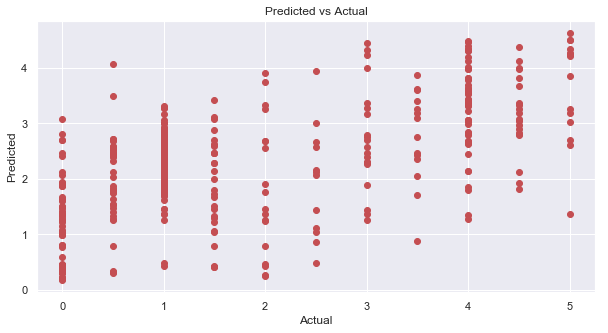

In [0]:
preprocessors = [PreprocessorLemmatizerNLTK, PreprocessorTokenizer, PreprocessorTokenizerDigits]
preprocessors = [preprocessorClass() for preprocessorClass in preprocessors]
embedding_based_extractor = EmbeddingBasedFeatureExtractor()
for preprocessor in preprocessors:
    print('Using', preprocessor.name, 'preprocessor...')
    X_train_tok = preprocessor.preprocess(X_train)
    X_test_tok = preprocessor.preprocess(X_test)
    features_train_token = token_based_features_extractor.extract(X_train_tok)
    features_test_token = token_based_features_extractor.extract(X_test_tok)
    print('TRAIN:')
    y_train_test_hat, y_train_test = predict_train(features_train_token, y_train, get_optimal_rf_model_train(features_train_token, y_train))
    plot_accuracy(y_train_test, y_train_test_hat)
    print('TEST:')
    y_test_hat = predict_test(features_train_token, y_train, get_optimal_rf_model(features_train_token, y_train), features_test_token)
    plot_accuracy(y_test, y_test_hat)

Different word2vec models:

Using TokenDigits preprocessor...
A:/BMI 598 project/cache/TokenDigits(train_data).p exists, loaded...
A:/BMI 598 project/cache/TokenDigits(test_data).p exists, loaded...
A:/BMI 598 project/cache/TokenFE(TokenDigits(train_data)).p exists, loaded...
A:/BMI 598 project/cache/TokenFE(TokenDigits(test_data)).p exists, loaded...
Token-based features:
TRAIN:
Accuracy: 0.8097351592570329


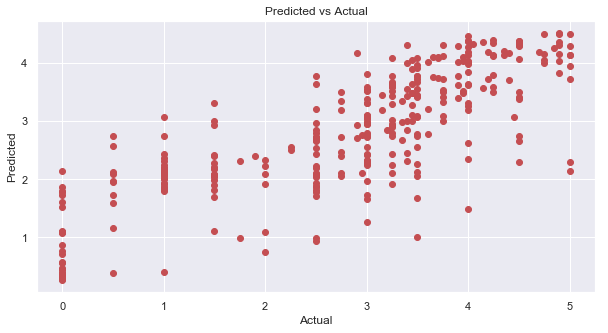

TEST:
Accuracy: 0.6199939686902824


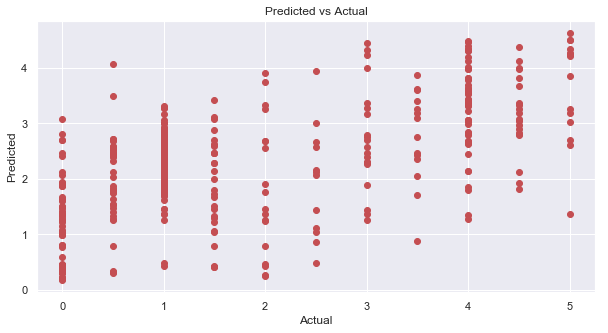

Using biowordvec model...
A:/BMI 598 project/cache/EmbeddingFE(biowordvec,TokenDigits(train_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(biowordvec).p exists, loaded...
A:/BMI 598 project/cache/EmbeddingFE(biowordvec,TokenDigits(test_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(biowordvec).p exists, loaded...
Embedding-based features:
TRAIN:
Accuracy: 0.8288170113594754


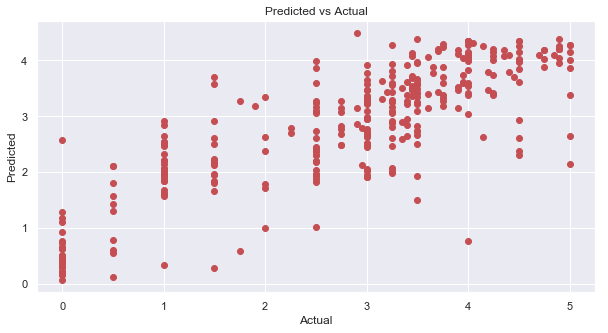

TEST:
Accuracy: 0.6641139314915185


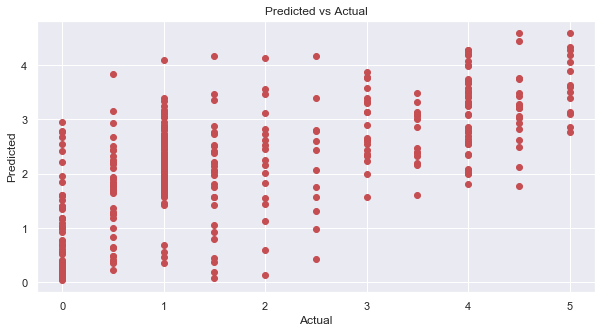

Combined features:
TRAIN:
Accuracy: 0.8452533126263742


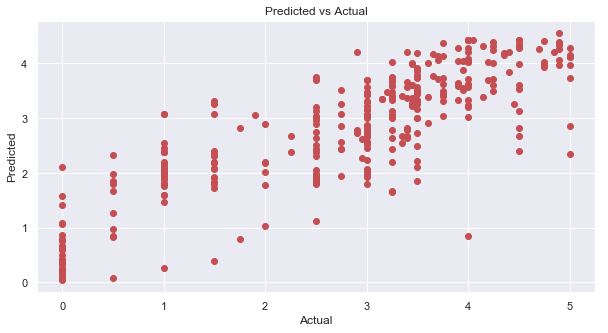

TEST:
Accuracy: 0.6932612101626272


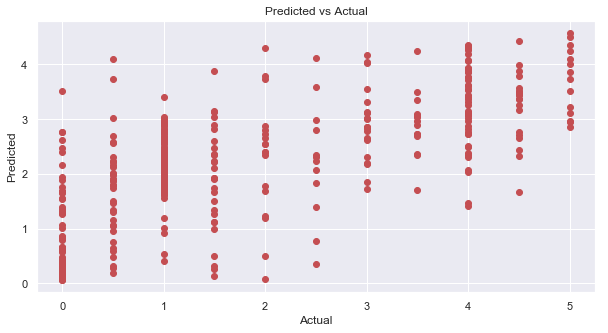

Using GoogleNews model...
A:/BMI 598 project/cache/EmbeddingFE(GoogleNews,TokenDigits(train_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(GoogleNews).p exists, loaded...
A:/BMI 598 project/cache/EmbeddingFE(GoogleNews,TokenDigits(test_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(GoogleNews).p exists, loaded...
Embedding-based features:
TRAIN:
Accuracy: 0.7527926457643274


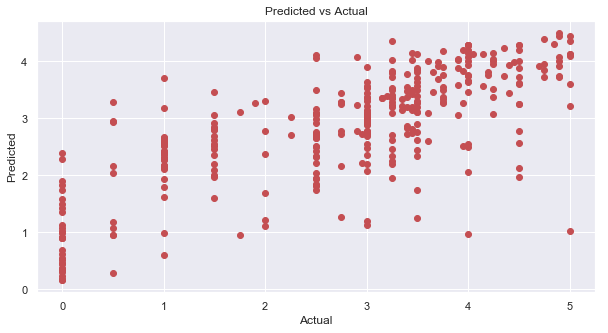

TEST:
Accuracy: 0.6633276537435523


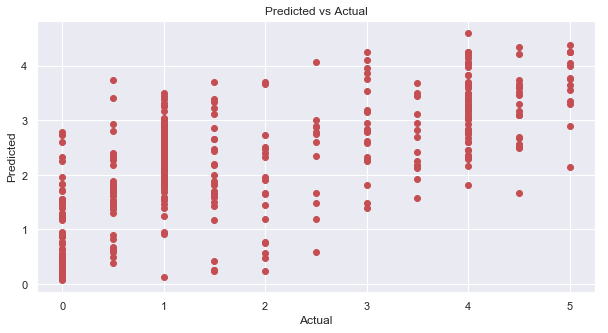

Combined features:
TRAIN:
Accuracy: 0.806499836501219


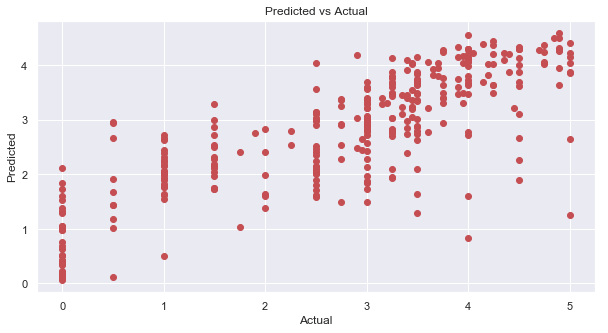

TEST:
Accuracy: 0.6985040306538766


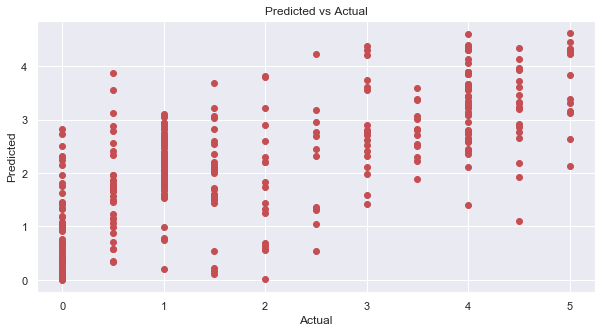

Using pmres1 model...
A:/BMI 598 project/cache/EmbeddingFE(pmres1,TokenDigits(train_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(pmres1).p exists, loaded...
A:/BMI 598 project/cache/EmbeddingFE(pmres1,TokenDigits(test_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(pmres1).p exists, loaded...
Embedding-based features:
TRAIN:
Accuracy: 0.7887135155656124


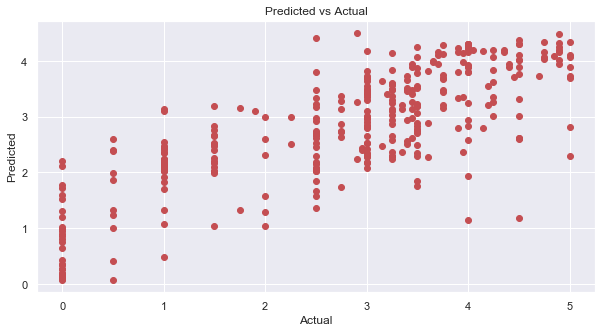

TEST:
Accuracy: 0.5752321994968388


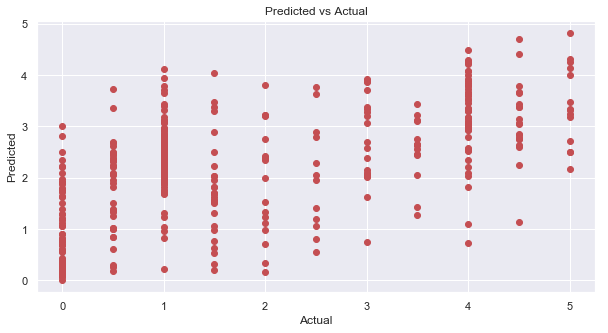

Combined features:
TRAIN:
Accuracy: 0.8282147683526115


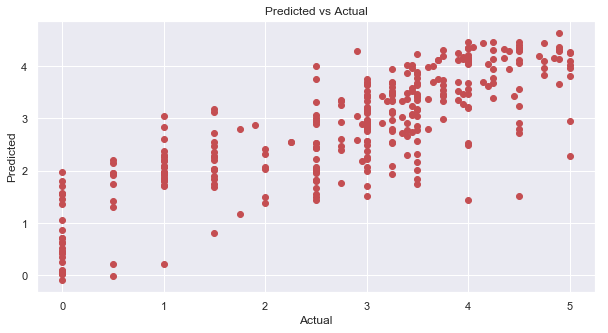

TEST:
Accuracy: 0.6542244954594805


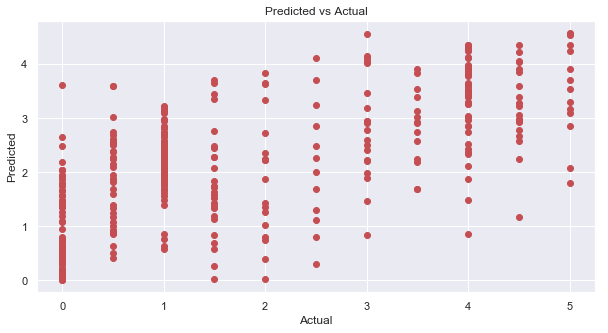

Using pmres2 model...
A:/BMI 598 project/cache/EmbeddingFE(pmres2,TokenDigits(train_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(pmres2).p exists, loaded...
A:/BMI 598 project/cache/EmbeddingFE(pmres2,TokenDigits(test_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(pmres2).p exists, loaded...
Embedding-based features:
TRAIN:
Accuracy: 0.795403007260479


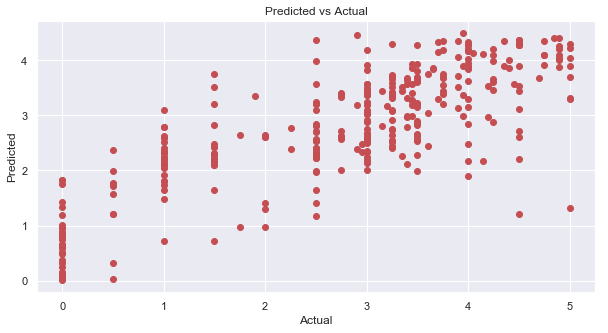

TEST:
Accuracy: 0.6239379067704576


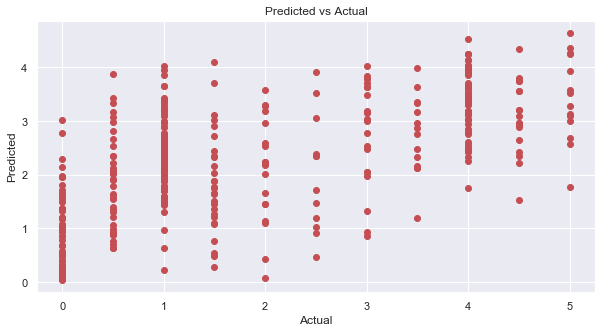

Combined features:
TRAIN:
Accuracy: 0.8242051868743898


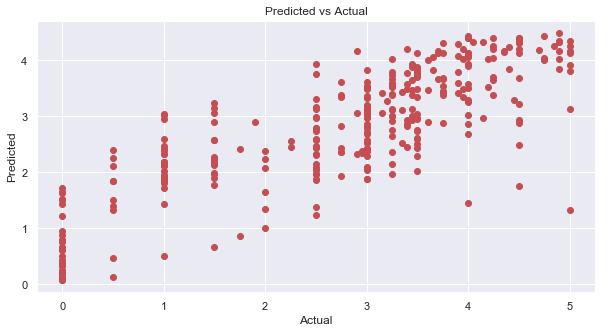

TEST:
Accuracy: 0.6717782063783885


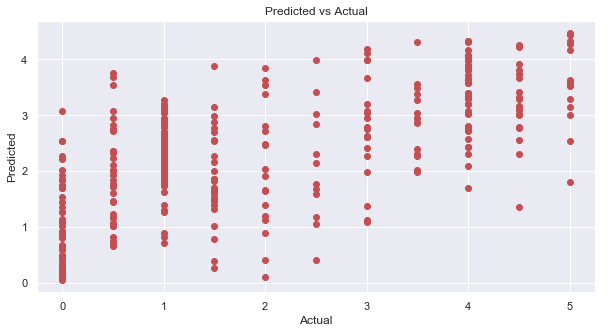

Using pmres3 model...
A:/BMI 598 project/cache/EmbeddingFE(pmres3,TokenDigits(train_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(pmres3).p exists, loaded...
A:/BMI 598 project/cache/EmbeddingFE(pmres3,TokenDigits(test_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(pmres3).p exists, loaded...
Embedding-based features:
TRAIN:
Accuracy: 0.7833895636439479


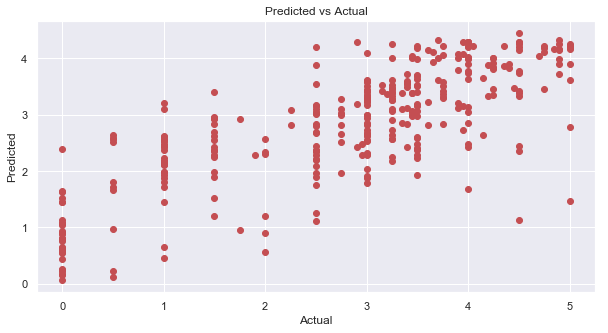

TEST:
Accuracy: 0.6413807596890948


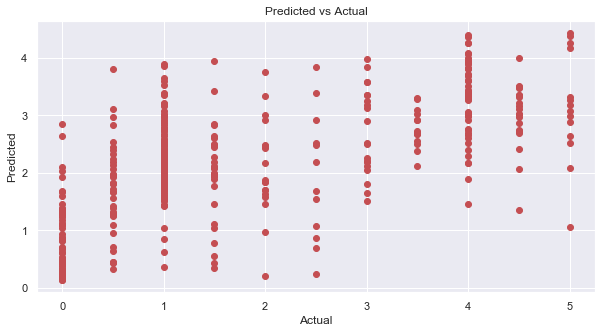

Combined features:
TRAIN:
Accuracy: 0.8162426588402222


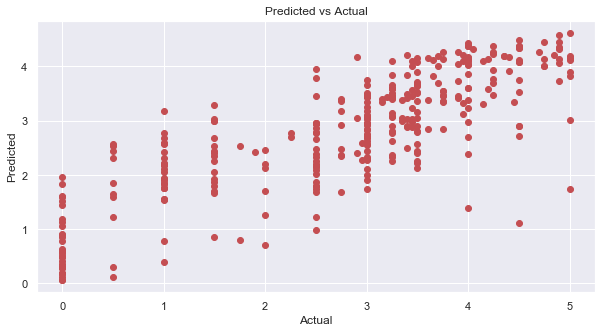

TEST:
Accuracy: 0.6877692601349032


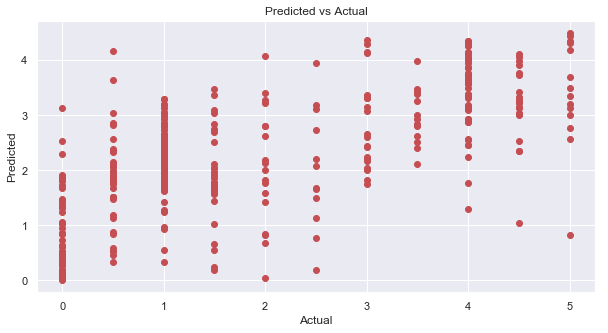

Using pmres4 model...
A:/BMI 598 project/cache/EmbeddingFE(pmres4,TokenDigits(train_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(pmres4).p exists, loaded...
A:/BMI 598 project/cache/EmbeddingFE(pmres4,TokenDigits(test_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(pmres4).p exists, loaded...
Embedding-based features:
TRAIN:
Accuracy: 0.7819702864621583


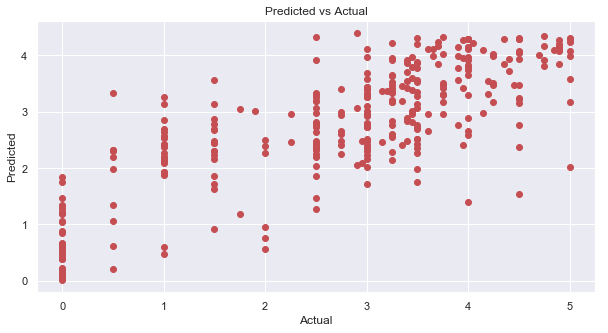

TEST:
Accuracy: 0.5861559194877213


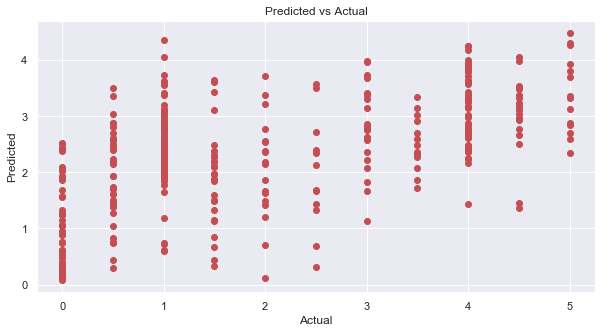

Combined features:
TRAIN:
Accuracy: 0.8241107024793253


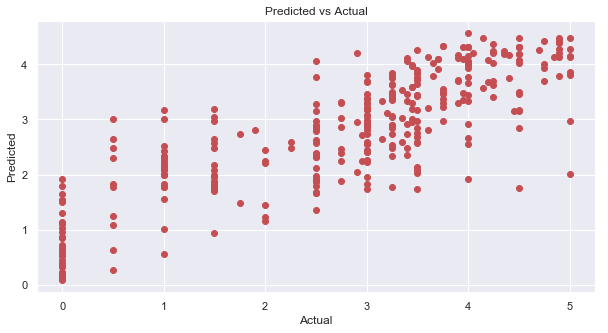

TEST:
Accuracy: 0.6633491933799183


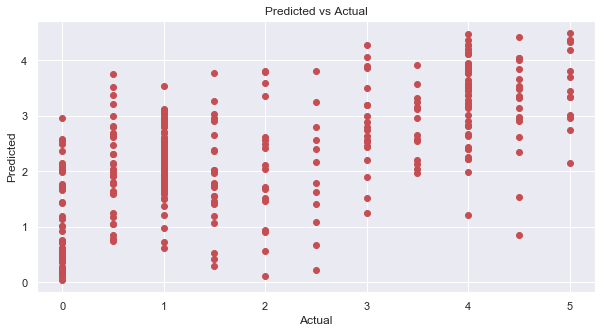

In [0]:
preprocessors = [PreprocessorTokenizerDigits]
#[PreprocessorLemmatizerNLTK, PreprocessorTokenizer, PreprocessorTokenizerDigits, PreprocessorTokenizerDigitsDifferent]
preprocessors = [preprocessorClass() for preprocessorClass in preprocessors]
w2v_models = [bio_word_vec, google_news, pmres_1, pmres_2, pmres_3, pmres_4]
token_based_features_extractor = TokenBasedFeatureExtractor()
embedding_based_extractor = EmbeddingBasedFeatureExtractor()
for preprocessor in preprocessors:
    print('Using', preprocessor.name, 'preprocessor...')
    X_train_tok = preprocessor.preprocess(X_train)
    X_test_tok = preprocessor.preprocess(X_test)
    features_train_token = token_based_features_extractor.extract(X_train_tok)
    features_test_token = token_based_features_extractor.extract(X_test_tok)
    # features_train_token_cropped = create_features_crop(features_train_token, lambda x: x[:500])
    print('Token-based features:')
    print('TRAIN:')
    y_train_test_hat, y_train_test = predict_train(features_train_token, y_train, get_optimal_rf_model_train(features_train_token, y_train))
    plot_accuracy(y_train_test, y_train_test_hat)
    print('TEST:')
    y_test_hat = predict_test(features_train_token, y_train, get_optimal_rf_model(features_train_token, y_train), features_test_token)
    plot_accuracy(y_test, y_test_hat)
    for w2v_model in w2v_models:
        print('Using', w2v_model.name, 'model...')
        features_train_emb = embedding_based_extractor.extract(X_train_tok, w2v_model)
        features_test_emb = embedding_based_extractor.extract(X_test_tok, w2v_model)
        print('Embedding-based features:')
        print('TRAIN:')
        y_train_test_hat, y_train_test = predict_train(features_train_emb, y_train, get_optimal_rf_model_train(features_train_emb, y_train))
        plot_accuracy(y_train_test, y_train_test_hat)
        print('TEST:')
        y_test_hat = predict_test(features_train_emb, y_train, get_optimal_rf_model(features_train_emb, y_train), features_test_emb)
        plot_accuracy(y_test, y_test_hat)
        features_train_all = create_features_concat(features_train_token, features_train_emb)
        features_test_all = create_features_concat(features_test_token, features_test_emb)
        print('Combined features:')
        print('TRAIN:')
        y_train_test_hat, y_train_test = predict_train(features_train_all, y_train, get_optimal_rf_model_train(features_train_all, y_train))
        plot_accuracy(y_train_test, y_train_test_hat)
        print('TEST:')
        y_test_hat = predict_test(features_train_all, y_train, get_optimal_rf_model(features_train_all, y_train), features_test_all)
        plot_accuracy(y_test, y_test_hat)

In [0]:
preprocessor = PreprocessorTokenizerDigits()
w2v_model = bio_word_vec
token_based_features_extractor = TokenBasedFeatureExtractor()
embedding_based_extractor = EmbeddingBasedFeatureExtractor()
X_train_tok = preprocessor.preprocess(X_train)
X_test_tok = preprocessor.preprocess(X_test)
features_train_token = token_based_features_extractor.extract(X_train_tok)
features_test_token = token_based_features_extractor.extract(X_test_tok)
features_train_emb = embedding_based_extractor.extract(X_train_tok, w2v_model)
features_test_emb = embedding_based_extractor.extract(X_test_tok, w2v_model)
features_train_all = create_features_concat(features_train_token, features_train_emb)
features_test_all = create_features_concat(features_test_token, features_test_emb)

A:/BMI 598 project/cache/TokenDigits(train_data).p exists, loaded...
A:/BMI 598 project/cache/TokenDigits(test_data).p exists, loaded...
A:/BMI 598 project/cache/TokenFE(TokenDigits(train_data)).p exists, loaded...
A:/BMI 598 project/cache/TokenFE(TokenDigits(test_data)).p exists, loaded...
A:/BMI 598 project/cache/EmbeddingFE(biowordvec,TokenDigits(train_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(biowordvec).p exists, loaded...
A:/BMI 598 project/cache/EmbeddingFE(biowordvec,TokenDigits(test_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(biowordvec).p exists, loaded...


In [0]:
preprocessor = PreprocessorTokenizerDigitsDifferent()
X_train_tok = preprocessor.preprocess(X_train)
X_test_tok = preprocessor.preprocess(X_test)
features_train_token = token_based_features_extractor.extract(X_train_tok)
features_test_token = token_based_features_extractor.extract(X_test_tok)
features_train_emb2 = embedding_based_extractor.extract(X_train_tok, w2v_model)
features_test_emb2 = embedding_based_extractor.extract(X_test_tok, w2v_model)

A:/BMI 598 project/cache/TokenDigitsDifferent(train_data).p exists, loaded...
A:/BMI 598 project/cache/TokenDigitsDifferent(test_data).p exists, loaded...
A:/BMI 598 project/cache/TokenFE(TokenDigitsDifferent(train_data)).p exists, loaded...
A:/BMI 598 project/cache/TokenFE(TokenDigitsDifferent(test_data)).p exists, loaded...
A:/BMI 598 project/cache/EmbeddingFE(biowordvec,TokenDigitsDifferent(train_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(biowordvec).p exists, loaded...
A:/BMI 598 project/cache/EmbeddingFE(biowordvec,TokenDigitsDifferent(test_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(biowordvec).p exists, loaded...


Accuracy: 0.6926805939708052


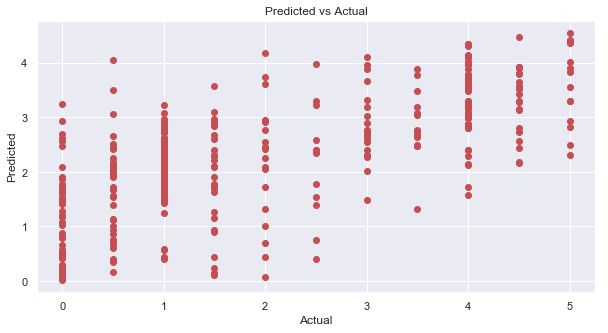

In [0]:
import copy
features_train_everything = create_features_concat(features_train_emb2, features_train_all)
features_test_everything = create_features_concat(features_test_emb2, features_test_all)

def evaluate_test_everything(features_train, features_test):
    y_test_hat = predict_test(features_train, y_train, get_optimal_rf_model(features_train, y_train), features_test)
    plot_accuracy(y_test, y_test_hat)
    
evaluate_test_everything(features_train_everything, features_test_everything)

A:/BMI 598 project/cache/TokenDigits(train_data).p exists, loaded...
A:/BMI 598 project/cache/TokenDigits(test_data).p exists, loaded...
A:/BMI 598 project/cache/TokenFE(TokenDigits(train_data)).p exists, loaded...
A:/BMI 598 project/cache/TokenFE(TokenDigits(test_data)).p exists, loaded...
A:/BMI 598 project/cache/EmbeddingFE(GoogleNews,TokenDigits(train_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(GoogleNews).p exists, loaded...
A:/BMI 598 project/cache/EmbeddingFE(GoogleNews,TokenDigits(test_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(GoogleNews).p exists, loaded...
Accuracy: 0.7139301763476951


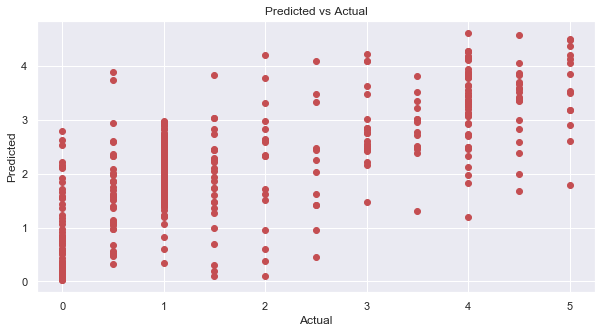

In [0]:
preprocessor = PreprocessorTokenizerDigits()
w2v_model = google_news
token_based_features_extractor = TokenBasedFeatureExtractor()
embedding_based_extractor = EmbeddingBasedFeatureExtractor()
X_train_tok = preprocessor.preprocess(X_train)
X_test_tok = preprocessor.preprocess(X_test)
features_train_token = token_based_features_extractor.extract(X_train_tok)
features_test_token = token_based_features_extractor.extract(X_test_tok)
features_train_emb = embedding_based_extractor.extract(X_train_tok, w2v_model)
features_test_emb = embedding_based_extractor.extract(X_test_tok, w2v_model)
features_train_all = create_features_concat(features_train_token, features_train_emb)
features_test_all = create_features_concat(features_test_token, features_test_emb)

features_train_everything = create_features_concat(features_train_everything, features_train_all)
features_test_everything = create_features_concat(features_test_everything, features_test_all)

evaluate_test_everything(features_train_everything, features_test_everything)

A:/BMI 598 project/cache/TokenDigits(train_data).p exists, loaded...
A:/BMI 598 project/cache/TokenDigits(test_data).p exists, loaded...
A:/BMI 598 project/cache/TokenFE(TokenDigits(train_data)).p exists, loaded...
A:/BMI 598 project/cache/TokenFE(TokenDigits(test_data)).p exists, loaded...
A:/BMI 598 project/cache/EmbeddingFE(pmres2,TokenDigits(train_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(pmres2).p exists, loaded...
A:/BMI 598 project/cache/EmbeddingFE(pmres2,TokenDigits(test_data)).p exists, loaded...
A:/BMI 598 project/cache/word2vec_vocab(pmres2).p exists, loaded...
Accuracy: 0.7168635126958671


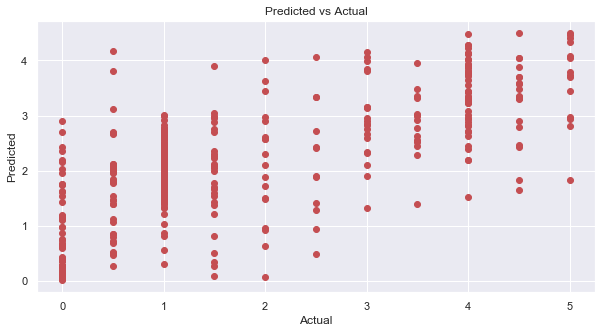

In [0]:
preprocessor = PreprocessorTokenizerDigits()
w2v_model = pmres_2
token_based_features_extractor = TokenBasedFeatureExtractor()
embedding_based_extractor = EmbeddingBasedFeatureExtractor()
X_train_tok = preprocessor.preprocess(X_train)
X_test_tok = preprocessor.preprocess(X_test)
features_train_token = token_based_features_extractor.extract(X_train_tok)
features_test_token = token_based_features_extractor.extract(X_test_tok)
features_train_emb = embedding_based_extractor.extract(X_train_tok, w2v_model)
features_test_emb = embedding_based_extractor.extract(X_test_tok, w2v_model)
features_train_all = create_features_concat(features_train_token, features_train_emb)
features_test_all = create_features_concat(features_test_token, features_test_emb)

features_train_everything = create_features_concat(features_train_everything, features_train_all)
features_test_everything = create_features_concat(features_test_everything, features_test_all)

evaluate_test_everything(features_train_everything, features_test_everything)

Optimal parameters: {'max_depth': 4, 'min_samples_split': 6, 'n_estimators': 500, 'subsample': 0.6}
Accuracy: 0.8093954908007329


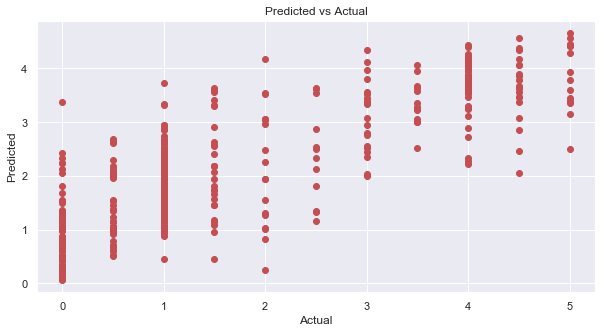

In [0]:
features_train_bert = pickle.load(open('bert_features/' + 'biobert_stsbiomedical_features.pkl', 'rb'))
features_test_bert = pickle.load(open('bert_features/' + 'biobert_stsbiomedical_test_features.pkl', 'rb'))
features_train_everything_bert = create_features(features_train_bert, 'biobert_stsbiomedical_train')
features_test_everything_bert = create_features(features_test_bert, 'biobert_stsbiomedical_test')
evaluate_test_everything(features_train_everything_bert, features_test_everything_bert)

Optimal parameters: {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 500, 'subsample': 0.6}
Accuracy: 0.8272466815988091


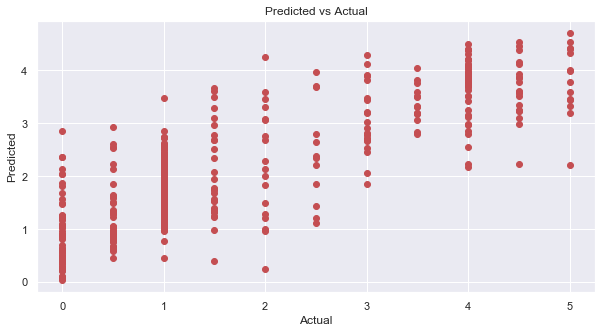

In [0]:
features_train_bert = pickle.load(open('bert_features/' + 'roberta_stsbiomedical_features.pkl', 'rb'))
features_test_bert = pickle.load(open('bert_features/' + 'roberta_stsbiomedical_test_features.pkl', 'rb'))
features_train_bert = create_features(features_train_bert, 'roberta_stsbiomedical_train')
features_test_bert = create_features(features_test_bert, 'roberta_stsbiomedical_test')
features_train_everything_bert = create_features_concat(features_train_everything_bert, features_train_bert)
features_test_everything_bert = create_features_concat(features_test_everything_bert, features_test_bert)
evaluate_test_everything(features_train_everything_bert, features_test_everything_bert)

Optimal parameters: {'max_depth': 6, 'min_samples_split': 4, 'n_estimators': 500, 'subsample': 0.8}
Accuracy: 0.829691533371499


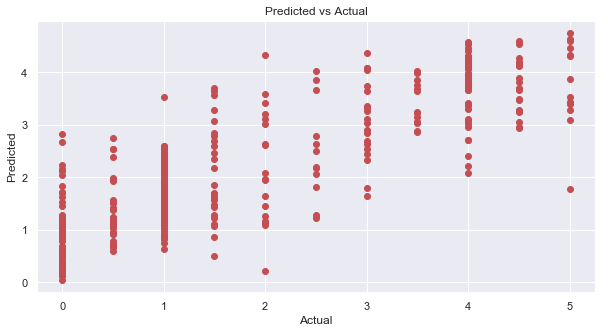

In [0]:
features_train_bert = pickle.load(open('bert_features/' + 'bert_stsbiomedical_features.pkl', 'rb'))
features_test_bert = pickle.load(open('bert_features/' + 'bert_stsbiomedical_test_features.pkl', 'rb'))
features_train_bert = create_features(features_train_bert, 'bert_stsbiomedical_train')
features_test_bert = create_features(features_test_bert, 'bert_stsbiomedical_test')
features_train_everything_bert = create_features_concat(features_train_everything_bert, features_train_bert)
features_test_everything_bert = create_features_concat(features_test_everything_bert, features_test_bert)
evaluate_test_everything(features_train_everything_bert, features_test_everything_bert)

Optimal parameters: {'max_depth': 6, 'min_samples_split': 4, 'n_estimators': 500, 'subsample': 0.8}
Accuracy: 0.8329906730633712


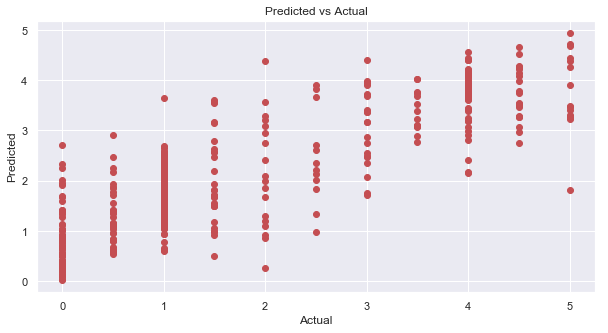

In [0]:
features_train_bert = pickle.load(open('bert_features/' + 'bioclinicalbert_features.pkl', 'rb'))
features_test_bert = pickle.load(open('bert_features/' + 'bioclinicalbert_test_features.pkl', 'rb'))
features_train_bert = create_features(features_train_bert, 'bioclinicalbert_train')
features_test_bert = create_features(features_test_bert, 'bioclinicalbert_test')
features_train_everything_bert = create_features_concat(features_train_everything_bert, features_train_bert)
features_test_everything_bert = create_features_concat(features_test_everything_bert, features_test_bert)
evaluate_test_everything(features_train_everything_bert, features_test_everything_bert)

BERT + word2vec

Optimal parameters: {'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.6}
Accuracy: 0.8407620892175294


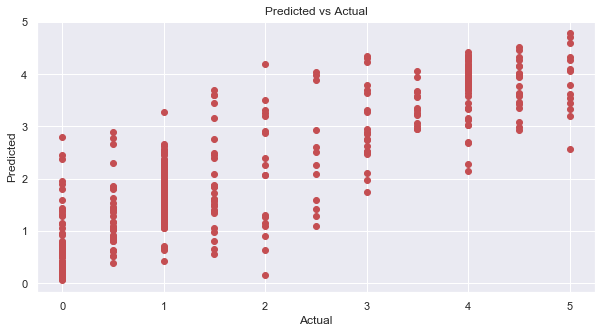

In [0]:
features_train_everything = create_features_concat(features_train_everything_bert, features_train_everything)
features_test_everything = create_features_concat(features_test_everything_bert, features_test_everything)
evaluate_test_everything(features_train_everything, features_test_everything)

Finally, all BERT and all BERT + word2vec

Optimal parameters: {'max_depth': 7, 'min_samples_split': 6, 'n_estimators': 500, 'subsample': 0.8}
Accuracy: 0.837212092210073


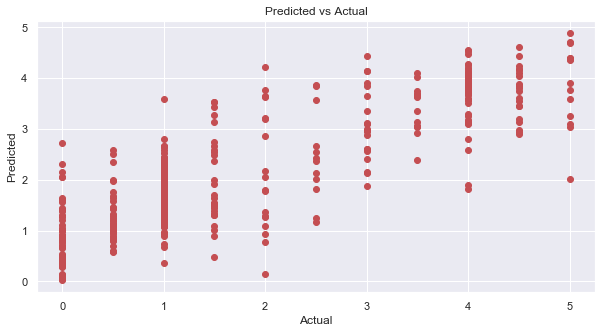

In [0]:
features_train_bert = pickle.load(open('bert_features/' + 'all_bert_features.pkl', 'rb'))
features_test_bert = pickle.load(open('bert_features/' + 'all_bert_test_features.pkl', 'rb'))
features_train_everything_bert = create_features(features_train_bert, 'bert_all_train')
features_test_everything_bert = create_features(features_test_bert, 'bert_all_test')
evaluate_test_everything(features_train_everything_bert, features_test_everything_bert)

Optimal parameters: {'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 500, 'subsample': 0.8}
Accuracy: 0.8445432599490381


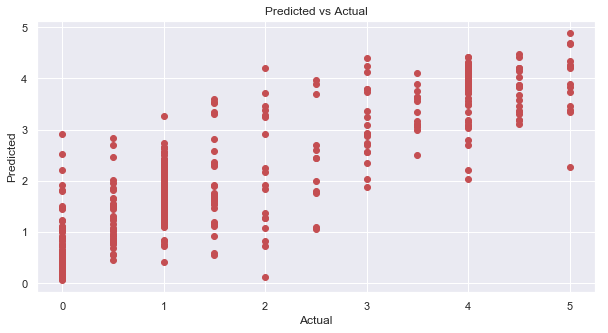

In [0]:
features_train_everything = create_features_concat(features_train_everything_bert, features_train_everything)
features_test_everything = create_features_concat(features_test_everything_bert, features_test_everything)
evaluate_test_everything(features_train_everything, features_test_everything)

In [0]:
w2v_models = [bio_word_vec, google_news, pmres_1, pmres_2, pmres_3, pmres_4]
for w2v_model in w2v_models:
    print(w2v_model.get_name())
    words_not_in_w2v = check_words(X_train_tok, w2v_model)
    print(len(words_not_in_w2v))
    print(words_not_in_w2v)

biowordvec
A:/BMI 598 project/cache/word2vec_vocab(biowordvec).p exists, loaded...
10
['‚ä¢', 'currentand', 'odegarden', 'dextroamph', 'errin', 'plexion', 'locationemergency', 'didnaa', 'educationready', 'locaation']
GoogleNews
A:/BMI 598 project/cache/word2vec_vocab(GoogleNews).p exists, loaded...
245
['roxicodone', 'protonix', 'pamelor', 'hent', 'zofran', 'minocin', 'flintstones', 'purpural', 'mfip', 'hctz', 'miralax', 'trendelenburg', 'rmw', 'pravachol', 'aprn', 'purpuric', 'dvt', 'ciprofloxin', 'xab', 'macrobid', 'supraglottis', 'subglottis', 'keppra', 'postnasal', 'estrace', 'cheratussin', 'lopressor', 'antecubital', 'iadl', 'patanol', 'postanesthesia', 'deferens', '‚ä¢', 'cartia', 'consolable', 'fontanel', 'detrol', 'ditropan', 'qsymia', 'combivent', 'zocor', 'prinivil', 'zestril', 'cantharidin', 'spironolacton', 'aldactazide', 'sudafed', 'lithotomy', 'nacl', 'plaquenil', 'azmacort', 'demadex', 'voltaren', 'rocephin', 'compazine', 'citracal', 'docusate', 'senokot', 'kenalog', 'xy